# **• DOMAIN: Telecom**

**• CONTEXT: : A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs**

**• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:**
> **• Customers who left within the last month – the column is called Churn**

> **• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies**

> **• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges**

> **• Demographic info about customers – gender, age range, and if they have partners and dependents**

**• PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.**

# 1. Import and warehouse data:

In [420]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from statistics import mean
from tkinter import *
import tkinter as tk
from tkinter import ttk
import pickle
from sklearn.neighbors import KNeighborsClassifier

In [117]:
os.chdir('C:\\Users\\VGopalak\\Desktop\\ML\\Ensemble Project')

**Reading Dataset**

In [315]:
df=pd.read_csv('TelcomCustomer-Churn.csv')

In [286]:
df_1=df.copy()

**Checking First 5 Rows**

In [292]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**Shape of the dataset**

In [293]:
df.shape

(7043, 21)

- **We have 21 columns and 7043 rows**

**Columns of the dataset**

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 2. Data cleansing:

**Information about the data**

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- **We can see all the text columns are displayed as object. We need to convert to categorical.**


- **Surprisingly Total Charges is object we need check any junk values or missing values are there in the column.**


In [122]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- **There is no missing values in the dataset.**

In [294]:
df.loc[df['TotalCharges']==' ']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

- **We are getting blank values whenever the tenure is zero. This implies there is no charge for that paticular customer.**


- **We will impute that value with zero**

In [316]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

- **All blank values are imputed as zero and datatype changed to float**


**We can drop customer id column as it is not useful for the model building**

In [317]:
df.drop(['customerID'],axis=1,inplace=True)

**We can see all the categorical columns has datatype as object.**


**We need to convert the datatype to categorical**

In [318]:
for i in df.select_dtypes(include=['object']).columns:
    df[i]=df[i].astype('category')  #changing the datatype of column to category

In [298]:
df.dtypes

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float32
Churn               category
dtype: object

- **All objects are changed into categorical**

# 3. Data analysis & visualisation:

**5 Point Summary**

In [15]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.732178
std         0.368612    24.559481       30.090047   2266.794434
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.549988
50%         0.000000    29.000000       70.350000   1394.550049
75%         0.000000    55.000000       89.850000   3786.599976
max         1.000000    72.000000      118.750000   8684.799805

- **Senior Citizen:** 
> **It has only two values 0 and 1. We will change this datatype into categorical.**


- **Tenure:** 
> **we have all range of tenure. Mean is greater than median so there might be little positive skewness.**


- **Monthly Charges:**
> **Mean is less than median, there might be left skewness in the data**


- **Total Charges:** 
> **0 values exists in the column. 75% of values are less than 3786 but the maximum value is 8684.We need to check for the outliers. Mean is greater than median there might be right skewness in the data.**

In [319]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category') #changing senior citizen column to category

# **Univariate Analysis**

**Distribution and outlier analysis of numerical variables**

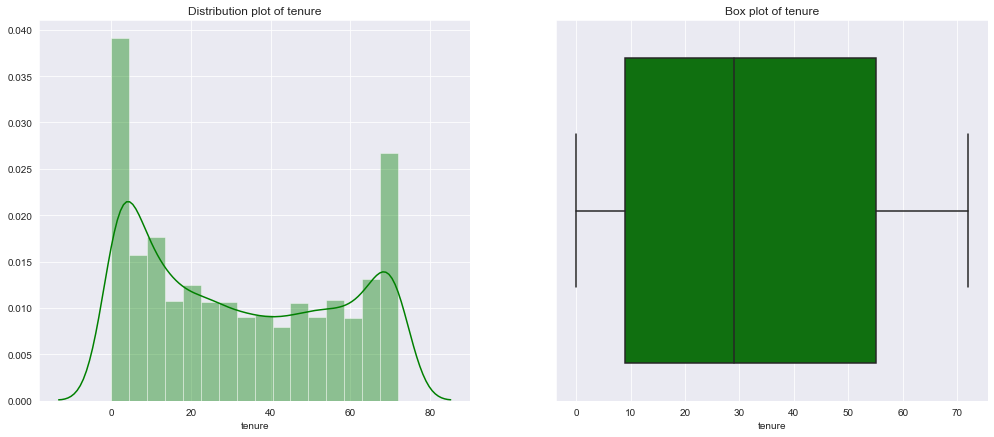

 Total Number of outliers in tenure: 0


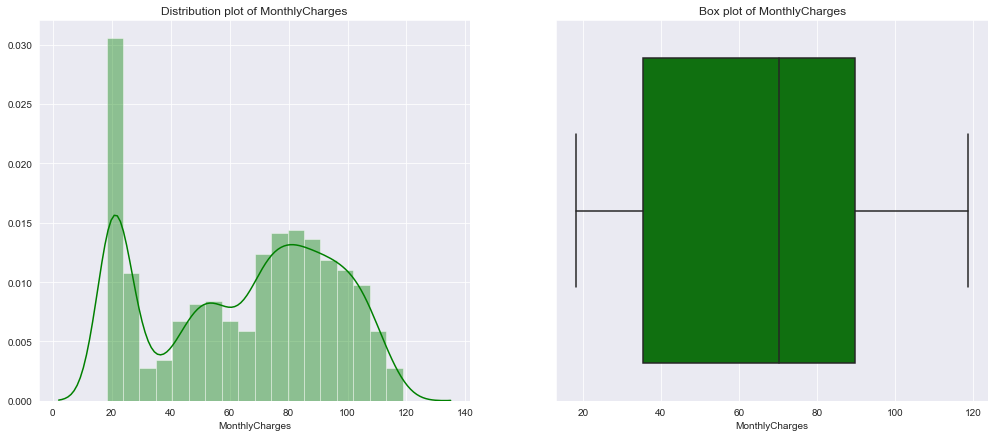

 Total Number of outliers in MonthlyCharges: 0


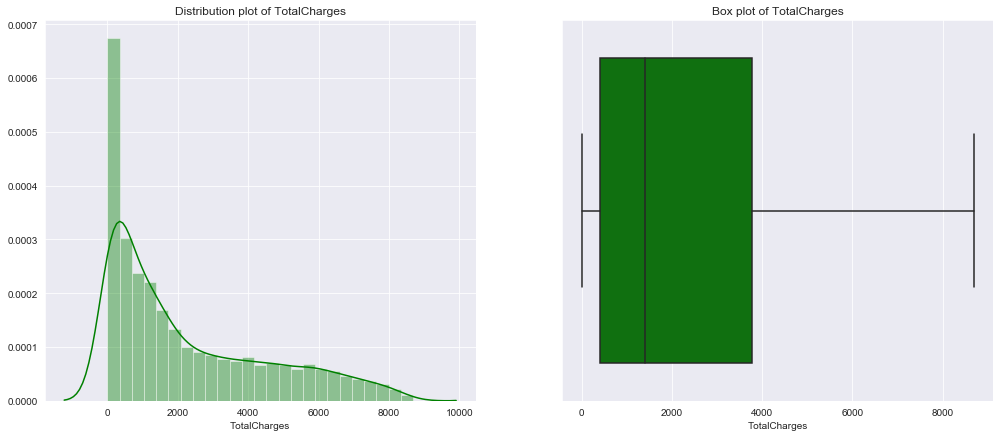

 Total Number of outliers in TotalCharges: 0


In [17]:
for i in df.select_dtypes(include=['int64','float64','float32']).columns:
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = i, data=df,  orient='h' , ax=axes[1],color="Green")
    #sns.set(axis_bgcolor='k')
    sns.distplot(df[i],  ax=axes[0],color='Green')
    axes[0].set_title('Distribution plot of {}'.format(i))
    axes[1].set_title('Box plot of {}'.format(i))
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i < lower or i > upper]
    print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))
    

- **Tenure:**

> **Data is not normally distributed**

> **We can see two spikes in the dataset**

> **Most of tenure lies between 10 to 55**

> **We have zero outliers in data**

- **Monthly Charges:**

> **There is no normal distribution**

> **We have no outliers in the data**

- **Total Charges:**

>**There is positive skewness in the data**






**Distribution of categorical variables.**

**Gender**

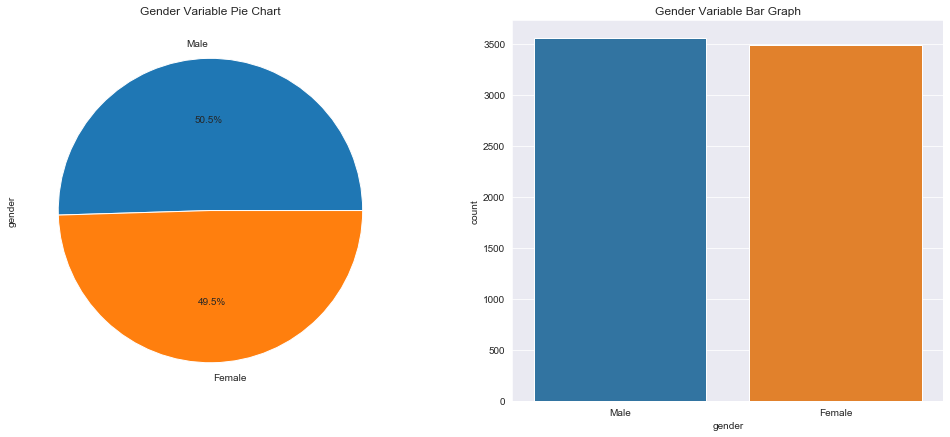

In [18]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('gender',data=df,ax=axes[1],order=['Male','Female'])
axes[0].set_title('Gender Variable Pie Chart')
axes[1].set_title('Gender Variable Bar Graph')
plt.show()

- **We have nearly equal distribution in both genders**

**Senior Citizen**

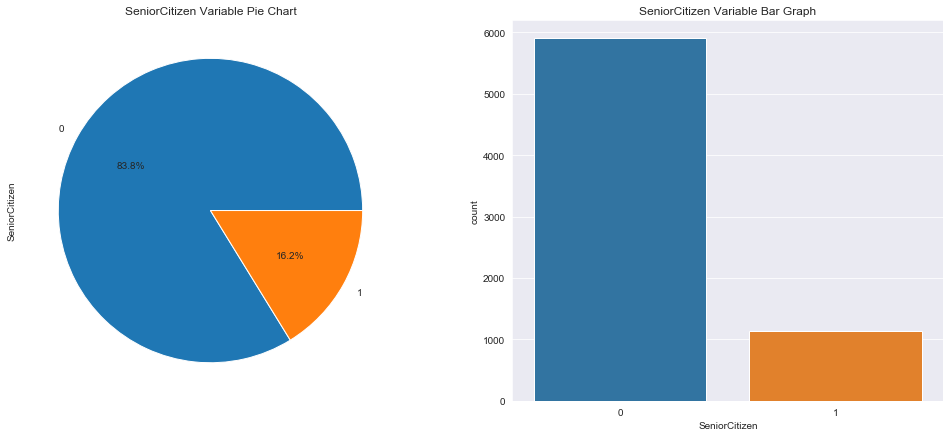

In [19]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('SeniorCitizen',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('SeniorCitizen Variable Pie Chart')
axes[1].set_title('SeniorCitizen Variable Bar Graph')
plt.show()

- **83 % of customers are not a senior citizen.**

**Partner**

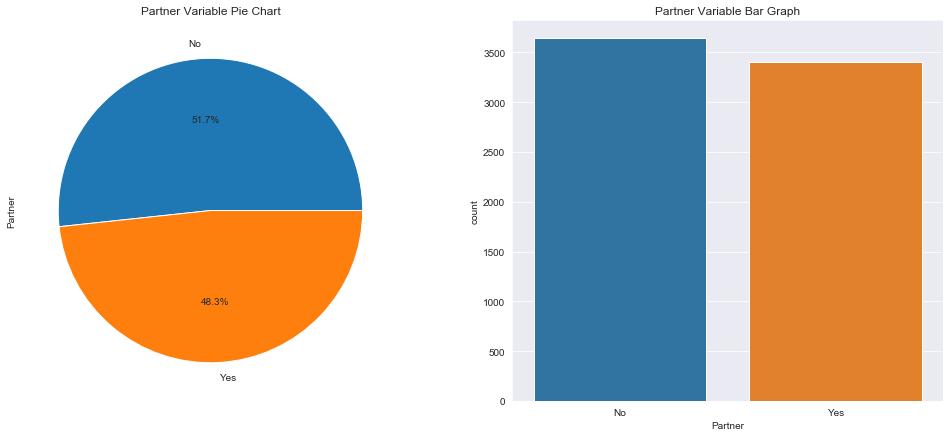

In [20]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Partner',data=df,ax=axes[1],order=['No','Yes'])
axes[0].set_title('Partner Variable Pie Chart')
axes[1].set_title('Partner Variable Bar Graph')
plt.show()

- **Customers with partners and non-partners are of equal distribution.**

**Dependents**

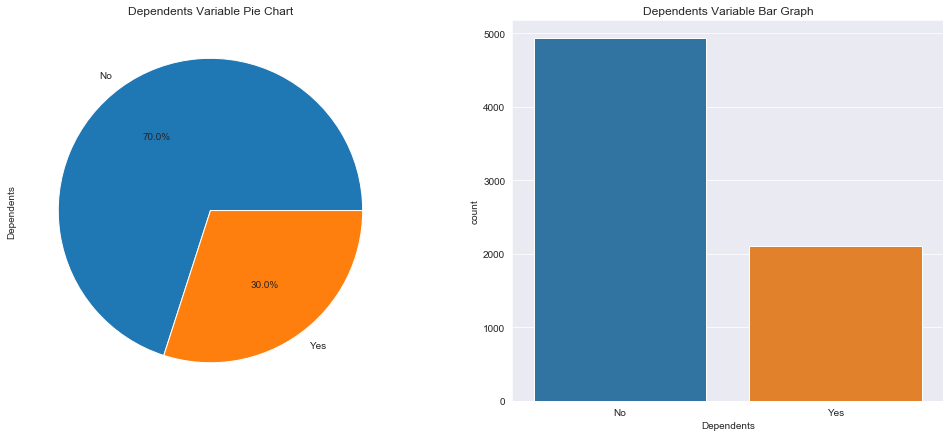

In [21]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Dependents',data=df,ax=axes[1],order=['No','Yes'])
axes[0].set_title('Dependents Variable Pie Chart')
axes[1].set_title('Dependents Variable Bar Graph')
plt.show()

- **70% of the customers does not have any dependents.**

**Phone Service**

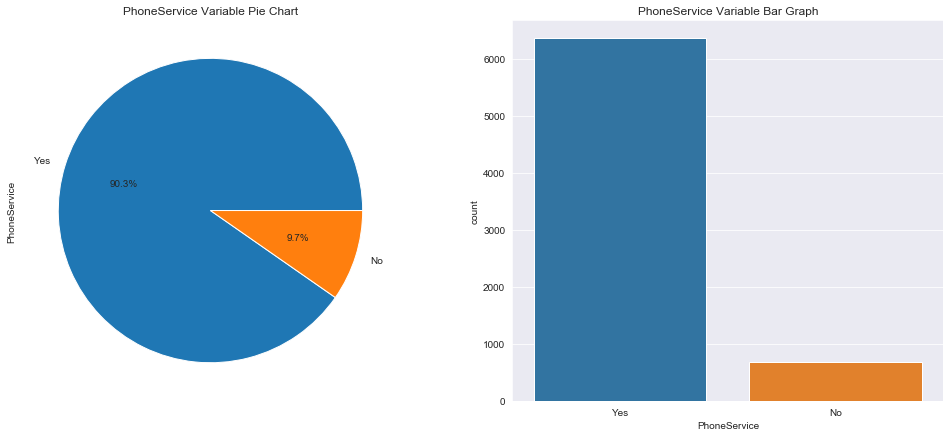

In [22]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('PhoneService',data=df,ax=axes[1],order=['Yes','No'])
axes[0].set_title('PhoneService Variable Pie Chart')
axes[1].set_title('PhoneService Variable Bar Graph')
plt.show()

- **90% of customers have phone service.**

**Multiple Lines**

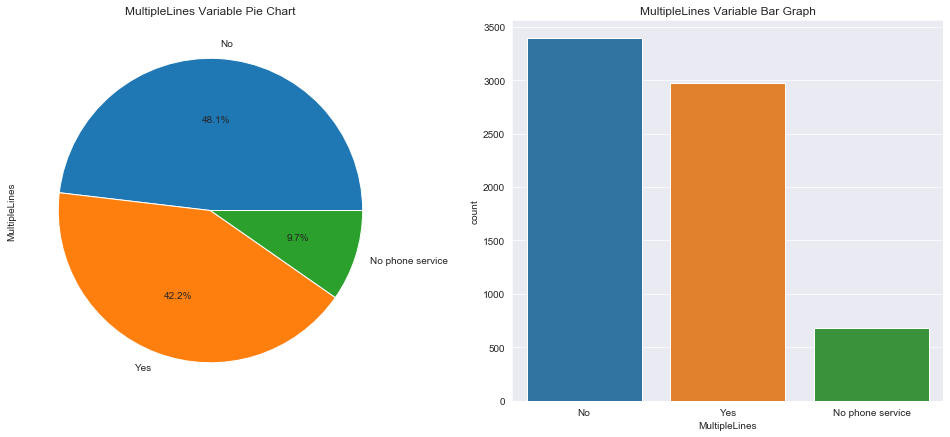

In [23]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('MultipleLines',data=df,ax=axes[1],order=['No','Yes','No phone service'])
axes[0].set_title('MultipleLines Variable Pie Chart')
axes[1].set_title('MultipleLines Variable Bar Graph')
plt.show()

- **Among the 90 % of customers with phone service 48 % of customers have multiple lines.**

**Internet Service**

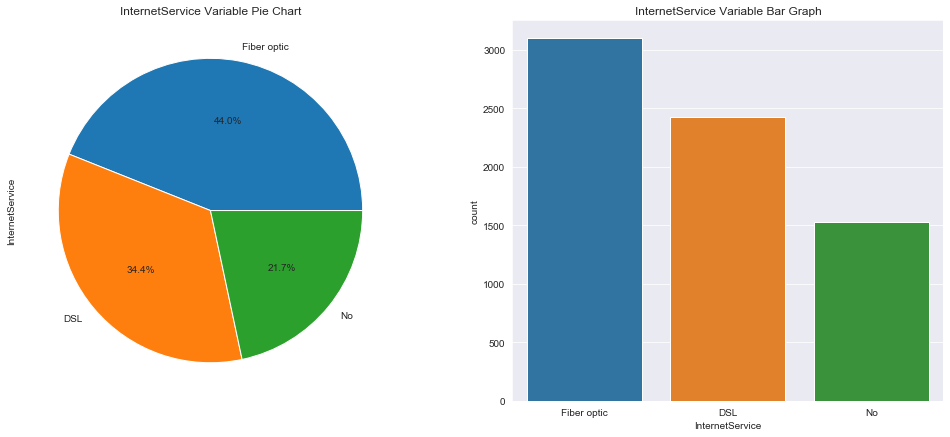

In [24]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('InternetService',data=df,ax=axes[1],order=['Fiber optic','DSL','No'])
axes[0].set_title('InternetService Variable Pie Chart')
axes[1].set_title('InternetService Variable Bar Graph')
plt.show()

- **44% of customers use fiber optic and 34% of people using DSL internet service.**


- **21% of customer does not have internet service.**

**OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies**

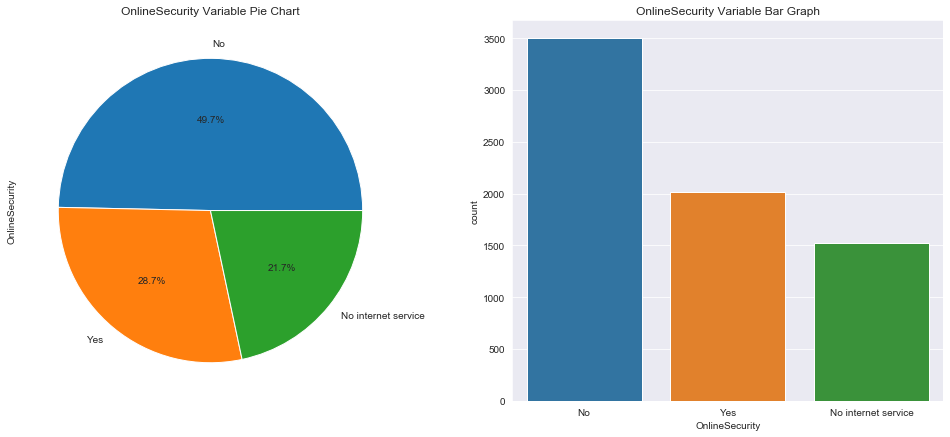

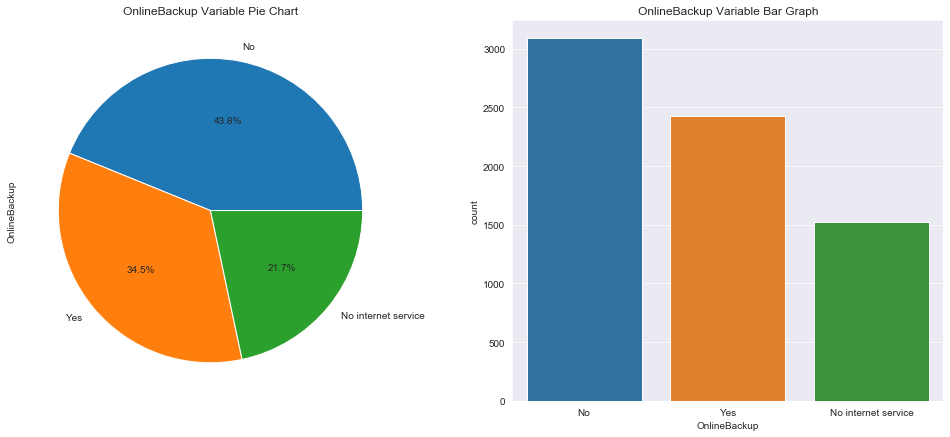

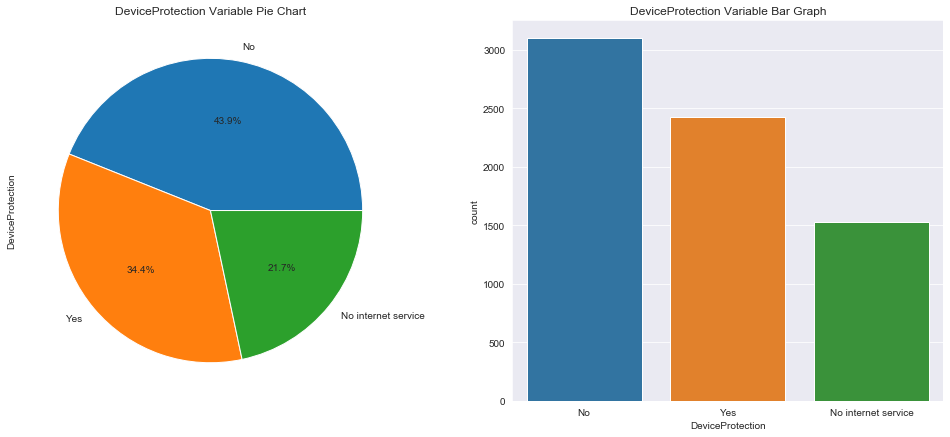

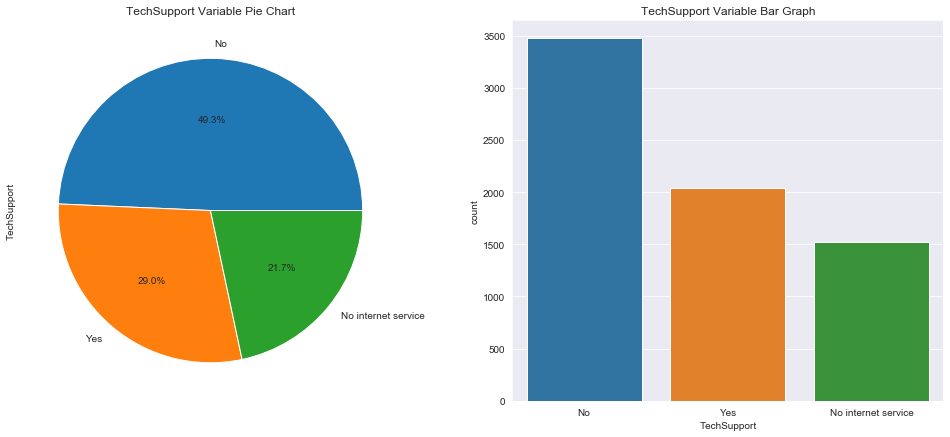

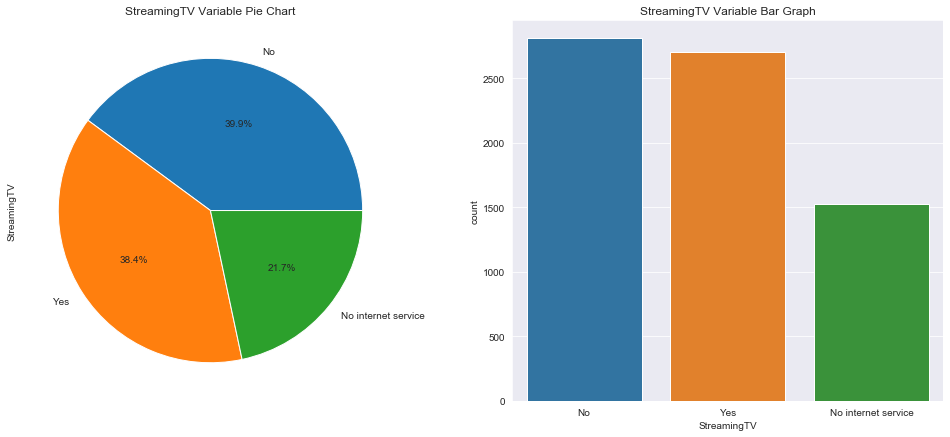

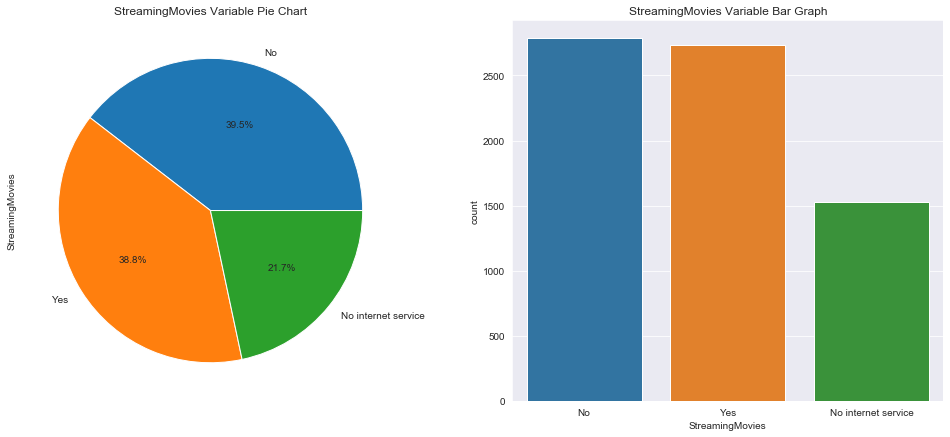

In [25]:
col=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in col:
    f,axes=plt.subplots(1,2,figsize=(17,7))
    df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    sns.countplot(i,data=df,ax=axes[1],order=['No','Yes','No internet service'])
    axes[0].set_title('{} Variable Pie Chart'.format(i))
    axes[1].set_title('{} Variable Bar Graph'.format(i))
    plt.show()

- **Nearly 50 % of customers does not have online security.**


- **43 % of customers doest not have online backup and device protection**


- **Nearly 50 % of customers does not have tech support**


- **39%  of customers does not have streaming tv and streaming movie option**

**Contract**

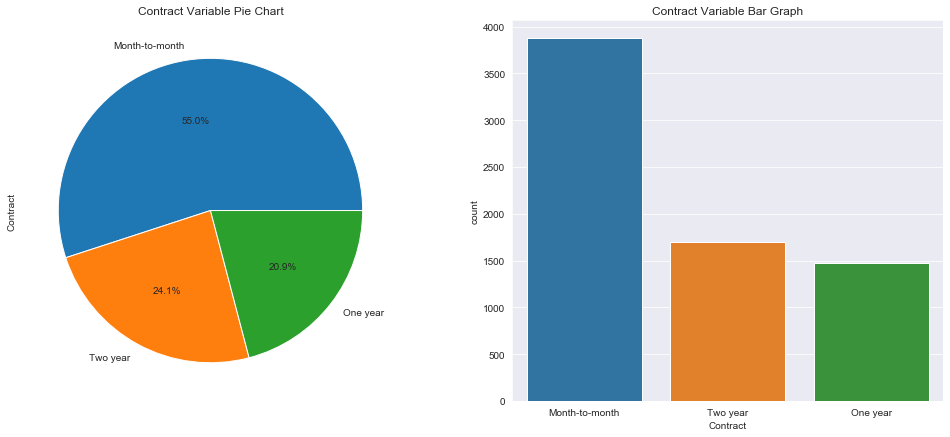

In [26]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Contract',data=df,ax=axes[1],order=['Month-to-month','Two year','One year'])
axes[0].set_title('Contract Variable Pie Chart')
axes[1].set_title('Contract Variable Bar Graph')
plt.show()

- **We have more number of month-to-month customers**


- **Two year and one year contract customers are nearly equal.**

**Paperless Billing**

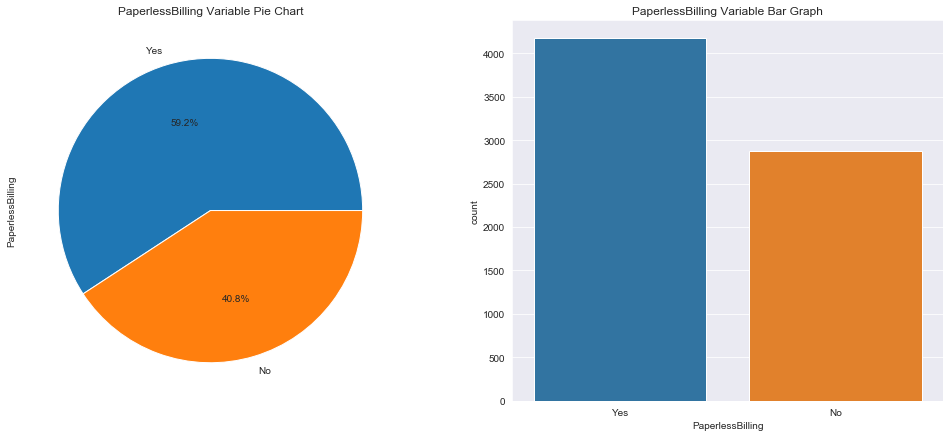

In [27]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('PaperlessBilling',data=df,ax=axes[1],order=['Yes','No'])
axes[0].set_title('PaperlessBilling Variable Pie Chart')
axes[1].set_title('PaperlessBilling Variable Bar Graph')
plt.show()

- **Nearly 60% of people using paper less billing.**  

**Payment Method**

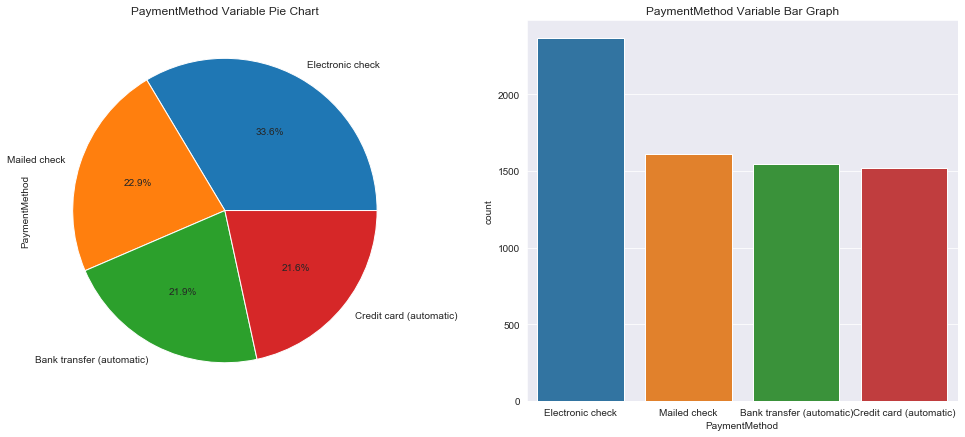

In [28]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('PaymentMethod',data=df,ax=axes[1],order=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
axes[0].set_title('PaymentMethod Variable Pie Chart')
axes[1].set_title('PaymentMethod Variable Bar Graph')
plt.show()

- **Nearly 34% of people using electronic check and 22% using mailed check.**


- **21% of people using bank transfer and credit card automatic**

**Distribution of target variable**

**Churn**

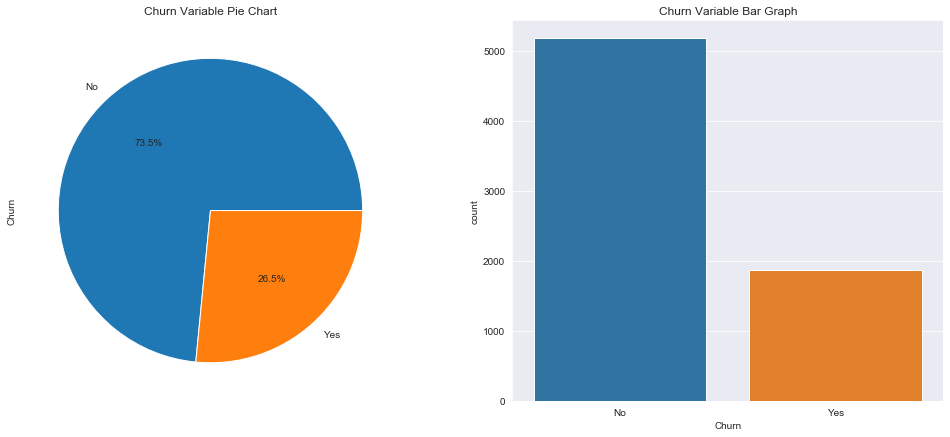

In [29]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Churn',data=df,ax=axes[1],order=['No','Yes'])
axes[0].set_title('Churn Variable Pie Chart')
axes[1].set_title('Churn Variable Bar Graph')
plt.show()

- **We have imbalance dataset.**


- **We need to concentrate on people who likely to churn. only 26.5% of churn customers details we have in our dataset.**

# Bivariate analysis

**Numerical vs Numerical**

**Tenure vs MonthlyCharges**

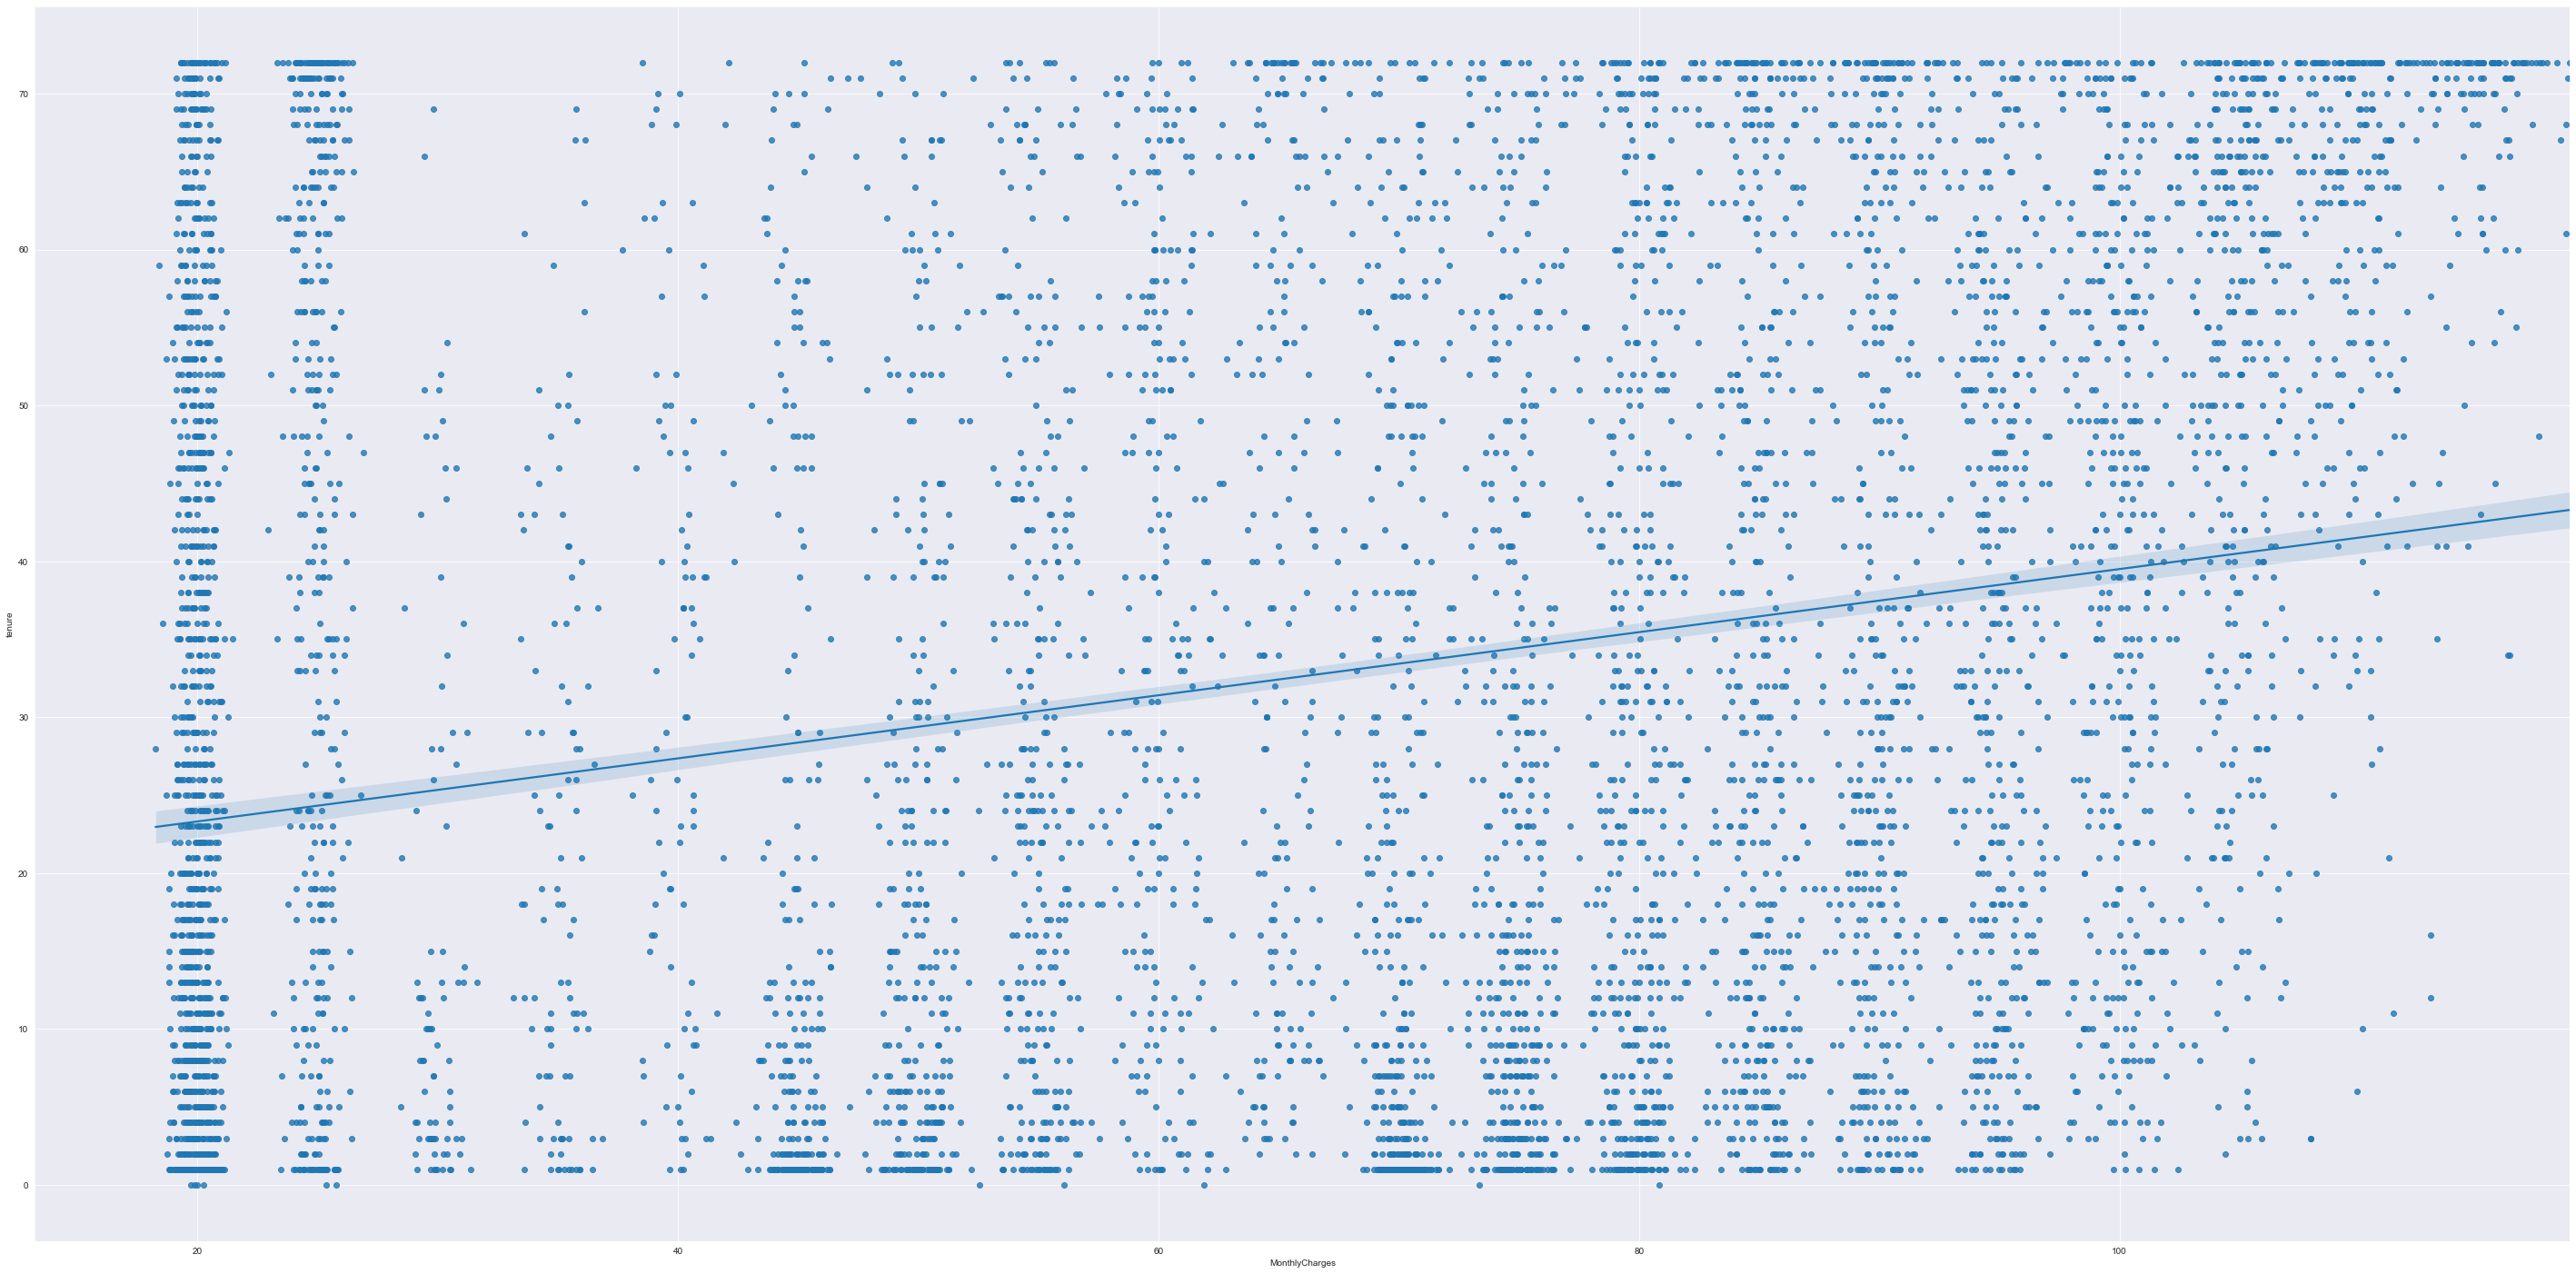

In [30]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='MonthlyCharges',y='tenure', data=df) # regression plot - scatter plot with a regression line

- **Tenure has slight correlation with monthly charges**

**Tenure vs TotalCharges**

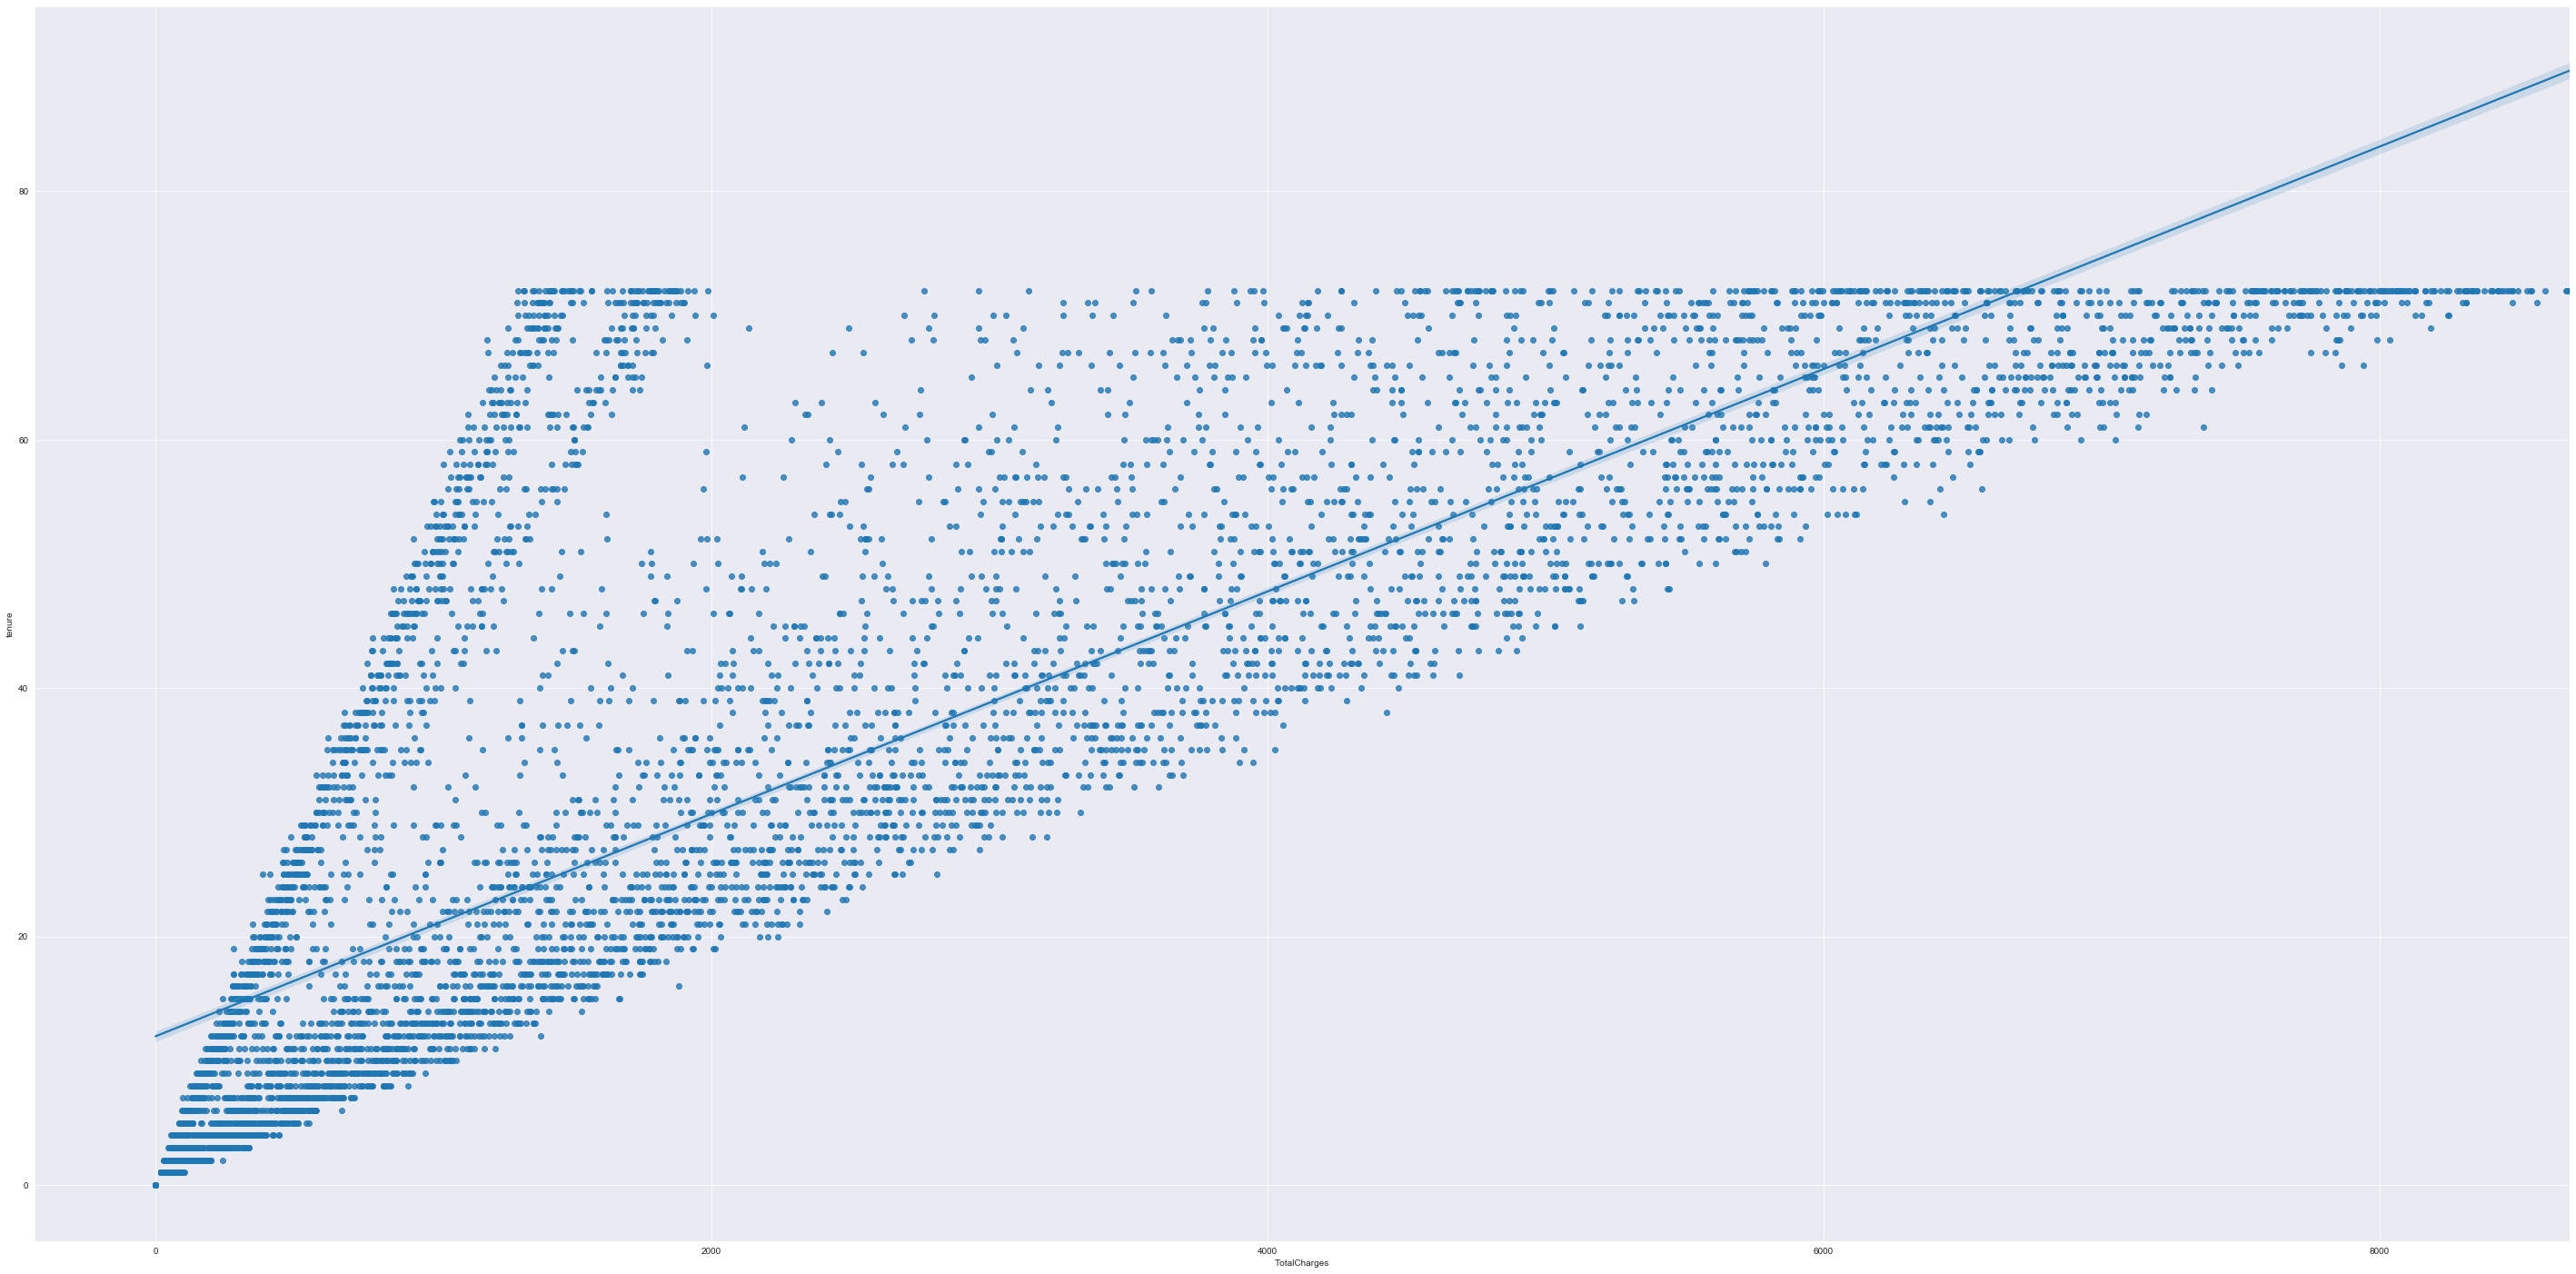

In [31]:
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='TotalCharges',y='tenure', data=df) # regression plot - scatter plot with a regression line

- **Total Charges increases on increase in tenure**

**Correlation among pairs of continuous variables**

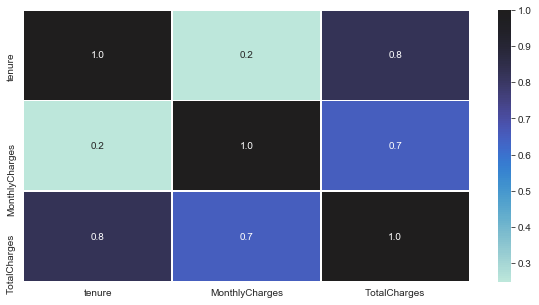

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

- **Total Charges has positive correlation with tenure and monthly charges**

**Categorical vs numerical**

**Monthly charges vs churn**

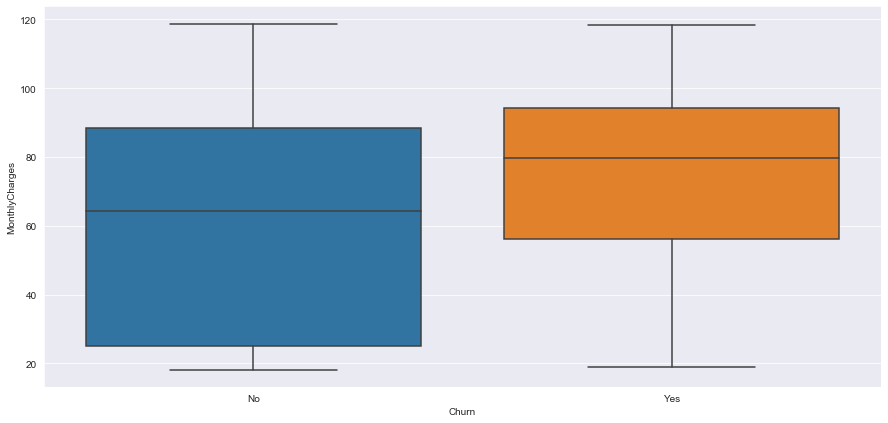

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y='MonthlyCharges', data= df)
plt.show()

- **Monthly charges is more for Churn customers.**

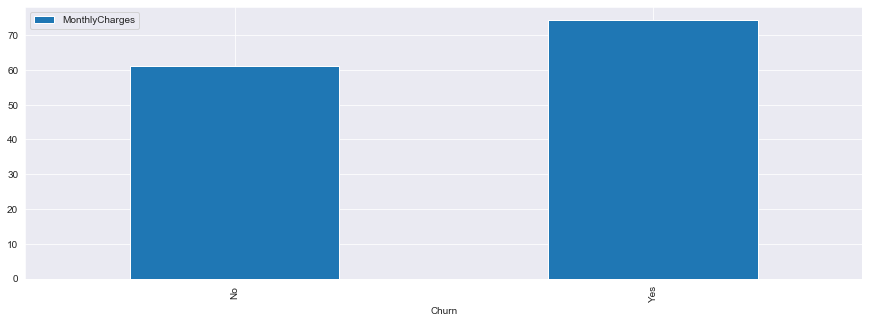

In [34]:
df.groupby(by=['Churn'])['MonthlyCharges'].mean().reset_index().sort_values(['Churn']).tail(10).plot(x='Churn',
                                                                                                           y='MonthlyCharges',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

- **We can see mean value of monthly charges is more for churned customers.**

**Total charges vs churn**

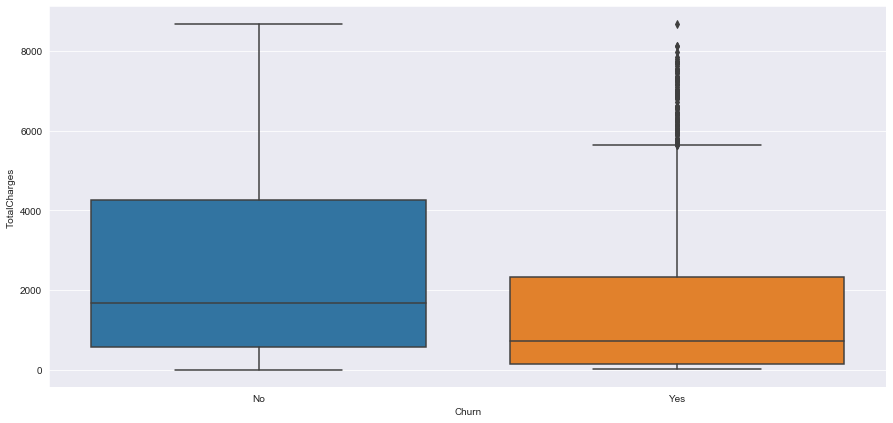

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y='TotalCharges', data= df)
plt.show()

- **Only few churned customers have high total charges**

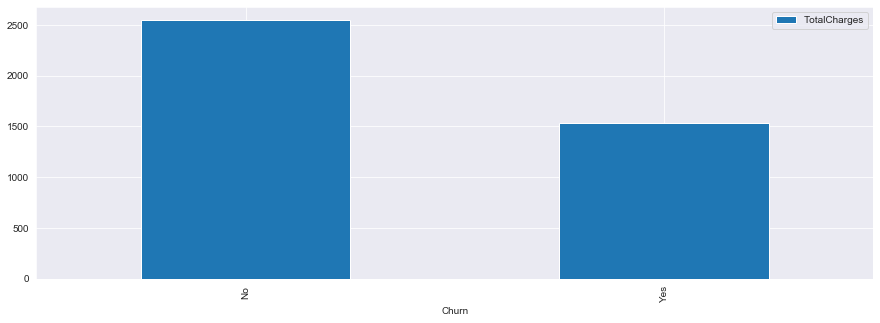

In [36]:
df.groupby(by=['Churn'])['TotalCharges'].mean().reset_index().sort_values(['Churn']).tail(10).plot(x='Churn',
                                                                                                           y='TotalCharges',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

- **Surprisingly mean of total charges is less for churned customers.**

**Tenure vs Churn**

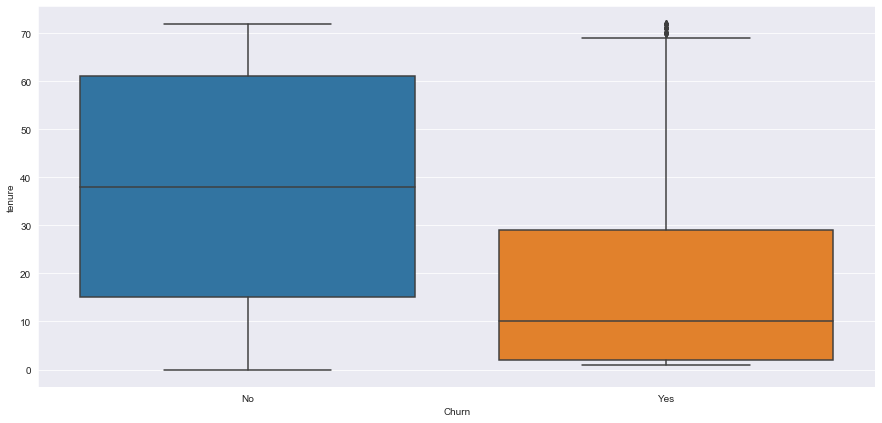

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y='tenure', data= df)
plt.show()

- **Recent clients are more likely to churn.**


- **Few cases long-term customers also geting churned**

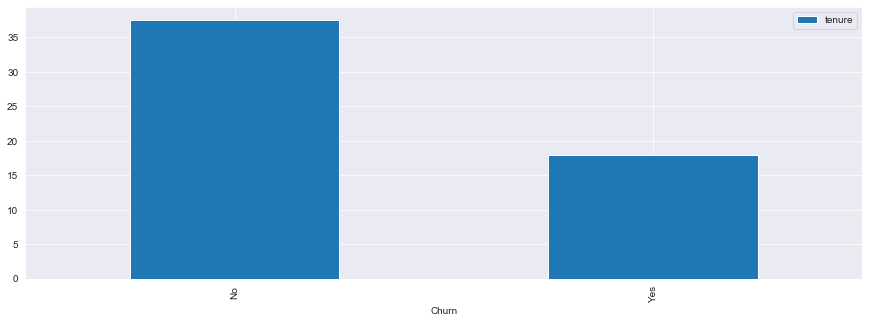

In [38]:
df.groupby(by=['Churn'])['tenure'].mean().reset_index().sort_values(['Churn']).tail(10).plot(x='Churn',
                                                                                                           y='tenure',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

plt.show()

- **We can see tenure mean is low for churned customer.**

**Category vs category**

In [129]:
data=df.copy() #taking copy of original dataframe

In [130]:
# Reassign target
data.Churn.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [41]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Churn'] != 0)]
    tmp2 = data[(data['Churn'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Churn']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : yes',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : no', opacity = 0.8, marker=dict(
        color='lightblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),  autosize = False,
                        height  = 500,
                        width   = 800,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Churn'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    plotly.offline.iplot(fig)


**Gender vs Churn**

In [42]:
barplot('gender', True)

- **Churn % rate for both male and female are equal to 26%**


- **Therefore, Churn is not affected by gender**

**Senior Citizen vs churn**

In [43]:
barplot('SeniorCitizen', True)

- **We can see senior citizen churn rate is 41% while non-seior citizen is 23%**


- **Senior citizen churn is more**

**Partner vs Churn**

In [44]:
barplot('Partner', True)

- **Churn % of customers with no partners is more**


- **For customers with no partners has 32% of churn rate while the customers with partner has 19%**

**Dependents vs churn**

In [45]:
barplot('Dependents', True)

- **Similar to partner person with no dependents has more churn rate**


- **Person with no dependent has 31% while the person with dependents has 15% of churn rate**

**Phone service vs churn**

In [46]:
barplot('PhoneService', True)

- **Churn rate is more or less equal regardless of customers with phone service or not.**


- **Customer with phone service has 26% and customer without phone service has 24% of churn rate.**

**multiple lines vs churn**

In [47]:
barplot('MultipleLines', True)

- **Churn rate is equally distributed for all classes of multiple lines.**

**InternetService vs churn**

In [48]:
barplot('InternetService', True)

- **We can see fiber optic internet sevice type has mor churn rate compared to DSL.**


- **Fiber Optic has 41% of churn rate and DSL has 18 %**


- **There is 7% of churn rate exists for customer with no internet service**

**OnlineSecurity vs churn**

In [49]:
barplot('OnlineSecurity', True)

- **Churn rate is more for the customer with no online security.**


- **It has churn rate of 41%**

**OnlineBackup vs churn**

In [50]:
barplot('OnlineBackup', True)

- **Churn rate is more for the customer who does not have onine backup**

**DeviceProtection vs churn**

In [51]:
barplot('DeviceProtection', True)

- **Churn rate is more for the customer who does not have Device Protection**

**TechSupport vs churn**

In [52]:
barplot('TechSupport', True)

- **Churn rate is more for the customer who does not have Tech support**

**StreamingTV vs churn**

In [53]:
barplot('StreamingTV', True)

- **Churn rate for customers who has streaming Tv and who does't have streaming tv are nearly equal**


- **Customer with streaming tv has 33% of churn while customer without streaming tv has 30% of churn rate**

**StreamingMovies vs churn**

In [54]:
barplot('StreamingMovies', True)

- **It has similar pattern like streaming Tv**

**Contract vs churn**

In [55]:
barplot('Contract', True)

- **We can clearly see that month-to-month contract customer has highest churn rate.**


- **Churn rate of month-to-month customer is 42%**


- **Two-year contract has very less churn rate(2%)**

**PaperlessBilling vs churn**

In [56]:
barplot('PaperlessBilling', True)

- **Customers with paperless billing has more churn rate**

**PaymentMethod vs churn**

In [57]:
barplot('PaymentMethod', True)

- **Customers with payment method as electronic check has more churn rate.**


- **Remaining payment method types has similar churn rate.**

# Multivariate analysis

**MonthlyCharges vs Churn vs Payment Method**

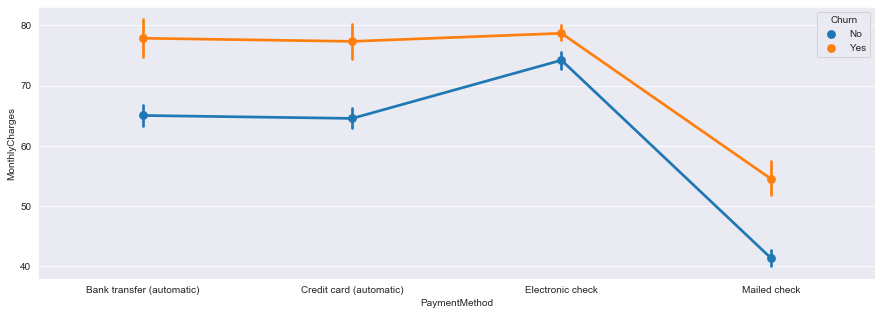

In [58]:
plt.figure(figsize=(15,5))
sns.pointplot(x="PaymentMethod", y="MonthlyCharges", hue = 'Churn',  data=df)
plt.show()

- **We can see monthly charges are more for churned customers.**


- **Only mailed check has less monthly charges**

**MonthlyCharges vs Churn vs Contract**

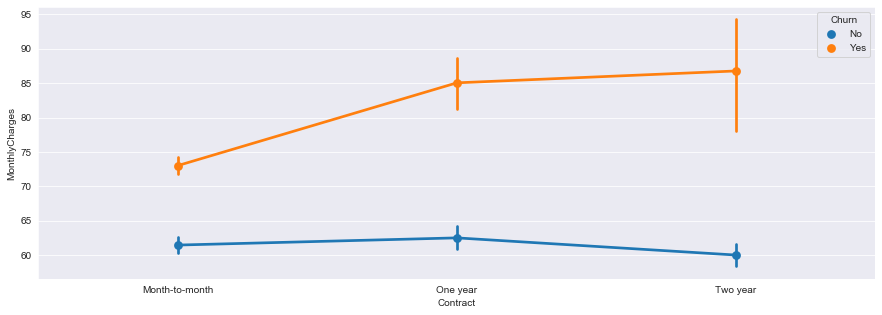

In [59]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Contract", y="MonthlyCharges", hue = 'Churn',  data=df)
plt.show()

- **Charges for two-year contract is more**


- **Churned customer charged more charges**

**MonthlyCharges vs Churn vs InternetService**

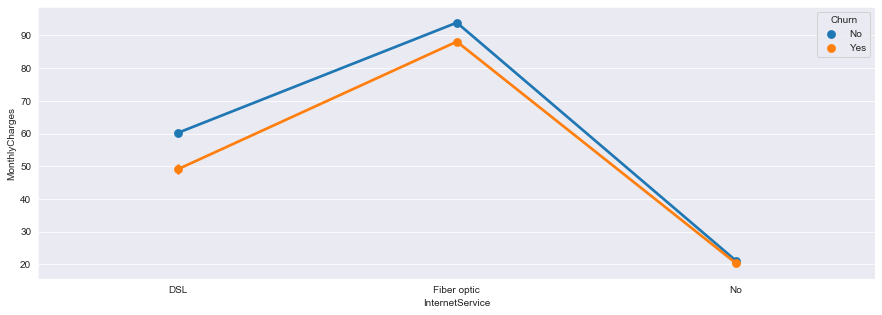

In [60]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetService", y="MonthlyCharges", hue = 'Churn',  data=df)
plt.show()


- **Here Surprisingly ,customer who does not churn has high monthly charges.**


- **Fiber optic has high monthly charges.**

#  Hypothesis Testing

**We can statistically check whether all the independent variables has significant effect on target variables**

In [61]:
class_summary=df.groupby('Churn') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

Churn     tenure  MonthlyCharges  TotalCharges
0    No  37.569965       61.265124   2549.911377
1   Yes  17.979133       74.441332   1531.796143

- **We can see difference in means for all continuous variables.**


- **Mean values differs for churned customers.**


- **We can do a statistical test on it.**

**Statistical Testing of continuous feature with target variable**

In [62]:
col=list(df.select_dtypes(include=['int64','float64','float32']).columns)

**Here we will be using two-sample unpaired t-test**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [63]:
for i in col:
    x = np.array(df[df.Churn == 'No'][i]) 
    y = np.array(df[df.Churn == 'Yes'][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Churned and non-churned customers are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of  Churned and non-churned customers are  same'.format('\033[1m',i))
    print('\n')

 P_Value:1.1954945472607148e-232
 Rejecting Null Hypothesis.tenure of Churned and non-churned customers are not same


 P_Value:8.592449331547539e-73
 Rejecting Null Hypothesis.MonthlyCharges of Churned and non-churned customers are not same


 P_Value:5.902796245371949e-75
 Rejecting Null Hypothesis.TotalCharges of Churned and non-churned customers are not same




- **It is evident that all three continuous column has effect on taget column**

**Statistical Testing of categorical features with target variable**

**Ho: There is no significant difference in gender for different category of target variable**

**H1: There is significant difference in gender for different category of target variable**    

In [64]:
crosstab=pd.crosstab(df['Churn'],df['gender'])
print(crosstab)

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930


**Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in gender among Churn (Yes and No)?**

In [65]:
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 0.48657873605618596


In [66]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('{} Rejecting Null Hypothesis. \n There is significant difference in gender for different category of target variable(Churn)'.format('\033[1m'))
else:
    print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in gender for different category of target variable(Churn)'.format('\033[1m'))

 Fail to Reject Null Hypothesis.
 There is no significant difference in gender for different category of target variable(Churn)


**Similarly we will check for other categorical columns**

In [67]:
cat_col=list(df.select_dtypes(include=['category']).columns)

In [68]:
cat_col.remove('gender')
cat_col.remove('Churn')

In [69]:
for i in cat_col:
    crosstab=pd.crosstab(df['Churn'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    print(i+':')
    print('\n')
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Churn)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Churn)'.format('\033[1m',i))
    print('\n')

SeniorCitizen:


 Rejecting Null Hypothesis. 
 There is significant difference in SeniorCitizen Feature for different category of target variable(Churn)


Partner:


 Rejecting Null Hypothesis. 
 There is significant difference in Partner Feature for different category of target variable(Churn)


Dependents:


 Rejecting Null Hypothesis. 
 There is significant difference in Dependents Feature for different category of target variable(Churn)


PhoneService:


 Fail to Reject Null Hypothesis.
 There is no significant difference in PhoneService Feature for different category of target variable(Churn)


MultipleLines:


 Rejecting Null Hypothesis. 
 There is significant difference in MultipleLines Feature for different category of target variable(Churn)


InternetService:


 Rejecting Null Hypothesis. 
 There is significant difference in InternetService Feature for different category of target variable(Churn)


OnlineSecurity:


 Rejecting Null Hypothesis. 
 There is significant difference

- **Statistically it is proved that phone service variable does not have any effect on target variable**

# 4. Data Preprocessing

# Label Encoding

**Seperating categorical and numerical columns**

In [321]:
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

**Label encoding Binary columns**

In [322]:
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

**one-hot encoding for multi-value columns**

In [323]:
df = pd.get_dummies(data = df,columns = multi_cols,drop_first=True )

**Scaling Numerical columns**

In [324]:
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [325]:
#dropping original values merging scaled values for numerical columns
df_data_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")


In [76]:
#df_copy=df.copy()

In [139]:
#for i in df.columns:
    #if i not in ('tenure','MonthlyCharges','TotalCharges'):
        #df[i]=df[i].astype('category') #changing datatype to category.

In [326]:
df.dtypes

gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
PhoneService                               int32
PaperlessBilling                           int32
Churn                                      int32
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No internet service            uint8
StreamingTV_Yes     

# **Correlation check.**

**We will drop multi-collinear columns.**

In [327]:
data=df.drop('Churn',axis=1)

In [328]:
#Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

#data = data.drop(columns = to_drop)

print(to_drop)

There are 7 columns to remove :
['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


**We have 7 columns to drop**

In [331]:
df.drop(columns=to_drop,axis=1,inplace=True)

# **Checking on Target Imbalance**

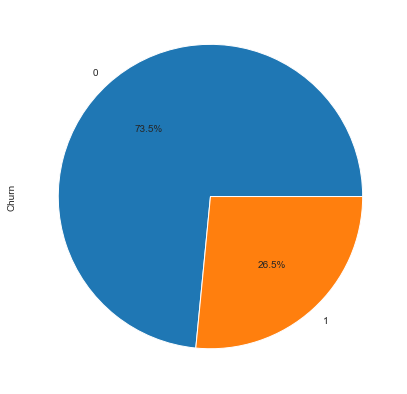

In [332]:
plt.figure(figsize=(17,7))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

> **There is  imbalance in target variable.** 

> **If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.**

> **A widely adopted technique for dealing with highly unbalanced datasets is called resampling**

**Two widely used resampling methods:**
    
**Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.**

**Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class**

#  Predictors and Target

In [333]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Churn')
y=df['Churn'] #target

**Building model without sampling**

# Train - Test Split

In [335]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# 5. Model training, testing and tuning:

# Decision Tree Model

In [336]:
model_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred=model_entropy.predict(X_test)
print('Performance on train data: ',model_entropy.score(X_train, y_train))  # performance on train data
print('Performance on test data: ',model_entropy.score(X_test, y_test))  # performance on test data

Performance on train data:  0.9979716024340771
Performance on test data:  0.7288215806909607


- **we can see there is high accuracy in training data and less accuracy in test data. This is due to Overfitting of data**

**Confusion Matrix**

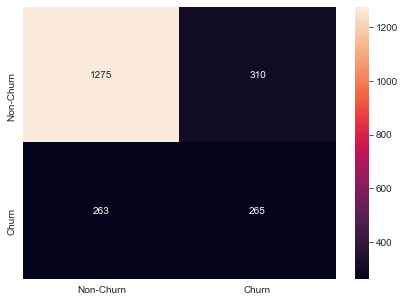

In [337]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Churn","Churn"]],
                  columns = [i for i in ["Non-Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

- **Here right upper and left lower box are the errors in the model.**

**Classification Report**

In [338]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1585
           1       0.46      0.50      0.48       528

    accuracy                           0.73      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.74      0.73      0.73      2113



- **We can see recall value of class 0 is 0.80 and class 1 is 0.50. This means 80% of time model correctly predicting class 0 but only 50% of time it is predicting class 1.**


- **This is purely due to imbalance in data and not proper pruning of data**


- **We will do the sampling and check how recall values improves in this case.**

# **SMOTE**

**we are doing smote only for training data**

In [339]:
smote=SMOTE(random_state=1)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [340]:
model_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')
model_entropy.fit(x_train_res, y_train_res)
y_pred=model_entropy.predict(X_test)
print('Performance on train data: ',model_entropy.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',model_entropy.score(X_test, y_test))  # performance on test data

Performance on train data:  0.9986068542769574
Performance on test data:  0.7236157122574538


- **We are getting high accuracy in training data and less accuracy in test data. This is due to overfitting of data.**

In [341]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1585
           1       0.46      0.59      0.52       528

    accuracy                           0.72      2113
   macro avg       0.65      0.68      0.66      2113
weighted avg       0.75      0.72      0.73      2113



- **After sampling we are getting very less improvement in recall**




**We will Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.**

In [342]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [343]:
y_pred=clf_pruned.predict(X_test)
print('Performance on train data: ',clf_pruned.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',clf_pruned.score(X_test, y_test))  # performance on test data

Performance on train data:  0.7392031206464196
Performance on test data:  0.6597255087553242


In [344]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72      1585
           1       0.42      0.91      0.57       528

    accuracy                           0.66      2113
   macro avg       0.68      0.74      0.64      2113
weighted avg       0.82      0.66      0.68      2113



- **We can see after pruning the performance of model is good.**


- **There is no overfit in data.**


- **We have used SMOTE and hyper parameter tuning to achieve best model.**


- **We will use grid search to find best hyper parameters.**

**Grid Search CV**

In [345]:
parameter={'max_depth':np.arange(1,5),'criterion':['entropy','gini'],
          'max_features':np.arange(1,10),'min_samples_leaf':np.arange(1,5)
           #,'max_leaf_nodes':np.arange(2,20)
          }

In [346]:
GS=GridSearchCV(DecisionTreeClassifier(random_state=1),parameter,cv=5)
GS.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4])})

In [347]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 1}

**We got the best paramters by using grid search cv**

In [348]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state=1,
                               max_depth=4, max_features=7,min_samples_leaf=1)
clf_pruned.fit(x_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       random_state=1)

In [349]:
y_pred=clf_pruned.predict(X_test)
print('Performance on train data: ',clf_pruned.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',clf_pruned.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.7601003064920591
Performance on test data:  0.7288215806909607
classification  Matrix:
               precision    recall  f1-score   support

           0       0.92      0.70      0.79      1585
           1       0.48      0.82      0.60       528

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.81      0.73      0.75      2113



**As our point of interest is predicting class 1. This parameter selection gives 82% accuracy on predicting class 1. This is more generalized model.**

In [350]:
print (pd.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = x_train_res.columns).sort_values(by=['Imp'],ascending=False))

                                            Imp
InternetService_Fiber optic            0.289635
tenure                                 0.176291
Contract_Two year                      0.175022
TotalCharges                           0.130674
Contract_One year                      0.106878
Partner                                0.101524
MonthlyCharges                         0.011372
InternetService_No                     0.007311
OnlineSecurity_Yes                     0.001293
StreamingMovies_Yes                    0.000000
PaymentMethod_Mailed check             0.000000
PaymentMethod_Electronic check         0.000000
PaymentMethod_Credit card (automatic)  0.000000
gender                                 0.000000
StreamingTV_Yes                        0.000000
TechSupport_Yes                        0.000000
SeniorCitizen                          0.000000
OnlineBackup_Yes                       0.000000
MultipleLines_Yes                      0.000000
PaperlessBilling                       0

- **We can see half of the variables are not contributing to model.**

**Dropping column which is not contributing to model.**

In [351]:
l=[]
a=pd.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = x_train_res.columns).sort_values(by=['Imp'],ascending=False)
for i in a[a['Imp']<=0].index:
    l.append(i)

In [352]:
X_1=X.drop(columns=l,axis=1)

**Building Model with selected paramteres**

In [354]:
smote=SMOTE(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.30, random_state=1)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state=1,
                               max_depth=4, max_features=7,min_samples_leaf=1)
clf_pruned.fit(x_train_res, y_train_res)
y_pred=clf_pruned.predict(X_test)
print('Performance on train data: ',clf_pruned.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',clf_pruned.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.7585678461967121
Performance on test data:  0.751538097491718
classification  Matrix:
               precision    recall  f1-score   support

           0       0.92      0.73      0.82      1585
           1       0.50      0.80      0.62       528

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.75      0.77      2113



**After training model with selected features we can see equal training and testing performance. This will reduce complexity in the model**

# Bagging

**We will build bagging on top of the decision tree which we built above**

**Defining grid search paramter**

In [359]:
params = {'n_estimators': np.arange(45,55)}

In [360]:
bgcl = BaggingClassifier(base_estimator=clf_pruned,random_state=1)
bc_grid = GridSearchCV(estimator=bgcl, param_grid=params, cv=5)
bc_grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=4,
                                                                               max_features=7,
                                                                               random_state=1),
                                         random_state=1),
             param_grid={'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54])})

In [361]:
bc_grid.best_params_

{'n_estimators': 45}

- **we have got best no of estimators using grid search.**

In [362]:
bgcl = BaggingClassifier(base_estimator=clf_pruned,n_estimators=45,random_state=1)

bgcl.fit(x_train_res, y_train_res)
y_pred=bgcl.predict(X_test)
print('Performance on train data: ',bgcl.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',bgcl.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.7581499024797994
Performance on test data:  0.750591575958353
classification  Matrix:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1585
           1       0.50      0.81      0.62       528

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.82      0.75      0.77      2113



**Performance of bagging is similar to Decision Tree.**

# **Random Forest**

In [363]:
parameter={'max_depth':np.arange(1,5),'criterion':['entropy','gini'],
          'max_features':np.arange(1,10),'min_samples_leaf':np.arange(1,5)
           ,'n_estimators': np.arange(45,55)
          }

In [364]:
RFG=GridSearchCV(RandomForestClassifier(random_state=1),parameter,cv=5)
RFG.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54])})

In [365]:
RFG.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 3,
 'n_estimators': 54}

**These are the best parameters for random forest.**

In [366]:
rfcl = RandomForestClassifier(criterion='gini',n_estimators = 54,max_depth=4, min_samples_leaf=3 ,random_state=1,max_features=2)
rfcl = rfcl.fit(x_train_res, y_train_res)
y_pred=rfcl.predict(X_test)
print('Performance on train data: ',rfcl.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',rfcl.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.7712454722764001
Performance on test data:  0.7425461429247515
classification  Matrix:
               precision    recall  f1-score   support

           0       0.93      0.71      0.81      1585
           1       0.49      0.84      0.62       528

    accuracy                           0.74      2113
   macro avg       0.71      0.78      0.71      2113
weighted avg       0.82      0.74      0.76      2113



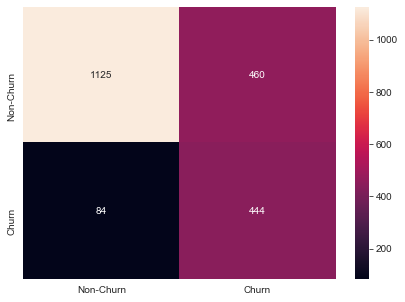

In [367]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Churn","Churn"]],
                  columns = [i for i in ["Non-Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

- **We can see slight improvement in recall and accuracy values.**


- **Accuracy of training and test score is balanced.**

# AdaBoosting

**Doing Ada boost on the best decision tree which we built above.**

In [368]:
params = {'n_estimators': np.arange(45,55),'learning_rate':[.001,0.01,.1]}

In [369]:
#abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),random_state=1)
abcl = AdaBoostClassifier(base_estimator=clf_pruned,random_state=1)

abcl_grid = GridSearchCV(estimator=abcl, param_grid=params, cv=5)
abcl_grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=4,
                                                                                max_features=7,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54])})

In [370]:
abcl_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 48}

In [371]:
abcl = AdaBoostClassifier(base_estimator=clf_pruned,n_estimators=48,learning_rate=0.1,random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train_res, y_train_res)
y_pred=abcl.predict(X_test)
print('Performance on train data: ',abcl.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',abcl.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.8208414600167178
Performance on test data:  0.7406530998580217
classification  Matrix:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1585
           1       0.49      0.78      0.60       528

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.74      0.76      2113



- **Training Accuracy is improved in ada boost.**


- **Recall value for class 1 is decreased in ada boost.**

# GradientBoost

In [372]:
params = {'n_estimators': np.arange(45,55), 'max_features':np.arange(1,10), 
          'max_depth':np.arange(1,5),'learning_rate':[.001,0.01,.1],'loss': ['deviance', 'exponential']}

In [373]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl_grid = GridSearchCV(estimator=gbcl, param_grid=params, cv=5)
gbcl_grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': array([1, 2, 3, 4]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54])})

In [374]:
gbcl_grid.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 8,
 'n_estimators': 50}

In [375]:
gbcl = GradientBoostingClassifier(learning_rate=0.1,loss='deviance',max_depth=4,max_features=8
                                  ,n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train_res, y_train_res)
y_pred=gbcl.predict(X_test)
print('Performance on train data: ',gbcl.score(x_train_res, y_train_res))  # performance on train data
print('Performance on test data: ',gbcl.score(X_test, y_test))  # performance on test data
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Performance on train data:  0.796043466146559
Performance on test data:  0.750591575958353
classification  Matrix:
               precision    recall  f1-score   support

           0       0.92      0.73      0.82      1585
           1       0.50      0.80      0.62       528

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.75      0.77      2113



- **Recall value is good for gradient boosting.**


- **We will select gradient boosting  as final model because it has balanced training and testing error.**

# KNN Classifier

In [421]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors
KNN.fit(x_train_res, y_train_res)
y_pred = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(x_train_res, y_train_res) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data: 0.8542769573697409
Accuracy on Test data: 0.7250354945575012
classification  Matrix:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1585
           1       0.47      0.73      0.57       528

    accuracy                           0.73      2113
   macro avg       0.68      0.73      0.68      2113
weighted avg       0.78      0.73      0.74      2113



**We are getting good training score but very less testing score**


**Recall value is nearly equal to both classes.**

**Checking with different K value**

In [422]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(x_train_res, y_train_res)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(x_train_res, y_train_res)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 0.9919197548063527:
Accuracy on Test data for k 1 is 0.7240889730241363:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      1585
           1       0.46      0.61      0.52       528

    accuracy                           0.72      2113
   macro avg       0.66      0.68      0.66      2113
weighted avg       0.76      0.72      0.74      2113

Accuracy on Training data for k 3 is 0.887712454722764:
Accuracy on Test data for k 3 is 0.7269285376242309:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1585
           1       0.47      0.68      0.55       528

    accuracy                           0.73      2113
   macro avg       0.67      0.71      0.68      2113
weighted avg       0.77      0.73      0.74      2113

Accuracy on Training data for k 5 is 0.8542769573697409:
Accuracy on Test dat

**In all k-values we are getting very good training score and less testing score.**

# Model Comaprision 

In [376]:
def score_model(model,params,cv):
    smote=SMOTE(random_state=1)
    train_score=[]
    test_score=[]
    for train_fold_index,test_fold_index in cv.split(X_1,y):
        X_train,X_test=X.iloc[train_fold_index],X.iloc[test_fold_index]
        y_train,y_test=y.iloc[train_fold_index],y.iloc[test_fold_index]
        X_train_res,y_train_res=smote.fit_resample(X_train,y_train)
        dtree=model(**params).fit(X_train_res,y_train_res)
        y_pred=dtree.predict(X_test)
        train_score.append(dtree.score(X_train_res,y_train_res))
        test_score.append(dtree.score(X_test,y_test))
    print('Train_score:',np.mean(np.array(train_score)))
    print('Test_score:',np.mean(np.array(test_score)))
    

**Here we will use these parameters and build model using k-fold to get better model.**

**Decision Tree Score**

In [377]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 1,'random_state':1}
score_model(DecisionTreeClassifier,params,cv)

Train_score: 0.7630566229051784
Test_score: 0.717454666344294


**Bagging**

In [379]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'base_estimator':clf_pruned,'n_estimators':45,'random_state':1}
score_model(BaggingClassifier,params,cv)

Train_score: 0.783221755097267
Test_score: 0.7438581963249515


**Random Forest**

In [380]:
cv=StratifiedKFold(n_splits=10,random_state=1)
#RandomForestClassifier(criterion='gini',n_estimators = 54,max_depth=4, min_samples_leaf=3 ,random_state=1,max_features=2)
params={'criterion':'gini','n_estimators':54,'max_depth':4,'min_samples_leaf':3,'random_state':1,'max_features':2}
score_model(RandomForestClassifier,params,cv)

Train_score: 0.7863032325059199
Test_score: 0.7442829223081883


**Ada Boost**

In [381]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'base_estimator':clf_pruned,'n_estimators':48,'learning_rate':0.1,'random_state':1}
#AdaBoostClassifier(base_estimator=clf_pruned,n_estimators=48,learning_rate=0.1,random_state=1)
score_model(AdaBoostClassifier,params,cv)

Train_score: 0.8246789626634554
Test_score: 0.7613239442295294


**Gradient Boosting**

In [382]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'loss':'deviance','n_estimators':50,'learning_rate':0.1,'max_depth':4,'max_features':8,'random_state':1}
#GradientBoostingClassifier(learning_rate=0.1,loss='deviance',max_depth=4,max_features=8
#                                 ,n_estimators = 50,random_state=1)

score_model(GradientBoostingClassifier,params,cv)

Train_score: 0.8152192142117656
Test_score: 0.756780303030303


**I will choose Ada Boost as a final model because it has good testing score. Both training and test scores are balanced.
Recall value of predicting class 1 is good compared to others.**

**Model Pickle**

In [392]:
# Save to file in the current working directory
pkl_filename = "pickle_adamodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(abcl, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

**I have pickled the model so that i can use it in any machine.**

# GUI

In [411]:
win=Tk()
win.geometry("400x600")
win.title("Diabetes Predictions")



Gender=Label(win,text="Gender:").grid(row=0,column=0)
Gender_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Gender_var).grid(row=0,column=1)


Senior_Citizen=Label(win,text="Senior Citizen:").grid(row=1,column=0)
Sen_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Sen_var).grid(row=1,column=1)


Partner=Label(win,text="Partner:").grid(row=2,column=0)
Partner_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Partner_var).grid(row=2,column=1)


Dep=Label(win,text="Dependents:").grid(row=3,column=0)
Dep_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Dep_var).grid(row=3,column=1)


Ten=Label(win,text="Tenure:").grid(row=4,column=0)
Ten_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Ten_var).grid(row=4,column=1)


Phone=Label(win,text="Phone Services:").grid(row=5,column=0)
Phone_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Phone_var).grid(row=5,column=1)


Mul=Label(win,text="Multiple Lines:").grid(row=6,column=0)
Mul_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Mul_var).grid(row=6,column=1)


Int=Label(win,text="Internet Service:").grid(row=7,column=0)
Int_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Int_var).grid(row=7,column=1)


Os=Label(win,text="Online Security:").grid(row=8,column=0)
Os_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Os_var).grid(row=8,column=1)


Ob=Label(win,text="Online Backup:").grid(row=9,column=0)
Ob_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Ob_var).grid(row=9,column=1)


Dev=Label(win,text="Device Protection:").grid(row=10,column=0)
Dev_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Dev_var).grid(row=10,column=1)


Ts=Label(win,text="Tech Support:").grid(row=11,column=0)
Ts_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Ts_var).grid(row=11,column=1)


St=Label(win,text="Streaming Tv:").grid(row=12,column=0)
St_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=St_var).grid(row=12,column=1)


Sm=Label(win,text="Streaming Movies:").grid(row=13,column=0)
Sm_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Sm_var).grid(row=13,column=1)


Cont=Label(win,text="Contract:").grid(row=14,column=0)
Cont_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Cont_var).grid(row=14,column=1)


Pb=Label(win,text="Paperless Billing:").grid(row=15,column=0)
Pb_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Pb_var).grid(row=15,column=1)


Pm=Label(win,text="Payment Method:").grid(row=16,column=0)
Pm_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Pm_var).grid(row=16,column=1)


Monthly_charges=Label(win,text="Monthly Charges:").grid(row=17,column=0)
Mon_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Mon_var).grid(row=17,column=1)


Total_charges=Label(win,text="Total Charges:").grid(row=18,column=0)
Tot_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Tot_var).grid(row=18,column=1)


def output():
    predicted=pickle_model.predict(DS)
    
    Predict_entrybox=ttk.Entry(win,width=16)
    Predict_entrybox.grid(row=21,column=1)
    
    if predicted==1:
        Predict_entrybox.insert(1,str('Yes'))
    elif predicted==0:
        Predict_entrybox.insert(1,str('No'))
    
    
def transform(DS):
    DS['InternetService_Fiber optic']=(DS['InternetService']=='Fiber optic')*1
    DS['InternetService_No']=(DS['InternetService']=='No')*1
    DS['OnlineSecurity_Yes']=(DS['OnlineSecurity']=='Yes')*1
    DS['Contract_One year']=(DS['Contract']=='One year')*1
    DS['Contract_Two year']=(DS['Contract']=='Two year')*1
    #dropping original column
    DS.drop('InternetService',axis=1,inplace=True)
    DS.drop('OnlineSecurity',axis=1,inplace=True)
    DS.drop('Contract',axis=1,inplace=True)
    
    col=['Partner', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'Contract_One year', 'Contract_Two year',
       'tenure', 'MonthlyCharges', 'TotalCharges']
    for i in DS.columns:
        if i not in col:
            DS.drop(i,axis=1,inplace=True)
    #scaling numerical columns
    std = StandardScaler()
    scaled = std.fit_transform(df[num_cols])
    scaled = pd.DataFrame(scaled,columns=num_cols)
    
    DS = DS.drop(columns = num_cols,axis = 1)
    DS = DS.merge(scaled,left_index=True,right_index=True,how = "left")
    #ordering the columns according to X_Test
    DS=DS[['Partner', 'InternetService_Fiber optic', 'InternetService_No',
           'OnlineSecurity_Yes', 'Contract_One year', 'Contract_Two year',
           'tenure', 'MonthlyCharges', 'TotalCharges']]


    
    
    #print(predicted)


DF = pd.DataFrame()


def action():
    global DS
    DB=pd.DataFrame()
    DF = pd.DataFrame(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',
                           'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                               'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges',
                               'TotalCharges'])
    GENDER=Gender_var.get()
    DF.loc[0,'gender']=GENDER
    
    SEN=Sen_var.get()
    DF.loc[0,'SeniorCitizen']=SEN
    
    PARTNER=Partner_var.get()
    DF.loc[0,'Partner']=PARTNER
    
    DEP=Dep_var.get()
    DF.loc[0,'Dependents']=DEP
    
    TEN=Ten_var.get()
    DF.loc[0,'tenure']=TEN
    
    PHONE=Phone_var.get()
    DF.loc[0,'PhoneService']=PHONE
    
    MUL=Mul_var.get()
    DF.loc[0,'MultipleLines']=MUL
    
    INT=Int_var.get()
    DF.loc[0,'InternetService']=INT
    
    OS=Os_var.get()
    DF.loc[0,'OnlineSecurity']=OS
    
    OB=Ob_var.get()
    DF.loc[0,'OnlineBackup']=OB
    
    DEV=Dev_var.get()
    DF.loc[0,'DeviceProtection']=DEV
    
    TS=Ts_var.get()
    DF.loc[0,'TechSupport']=TS
    
    ST=St_var.get()
    DF.loc[0,'StreamingTV']=ST
    
    SM=Sm_var.get()
    DF.loc[0,'StreamingMovies']=SM
    
    CONT=Cont_var.get()
    DF.loc[0,'Contract']=CONT
    
    PB=Pb_var.get()
    DF.loc[0,'PaperlessBilling']=PB
    
    PM=Pm_var.get()
    DF.loc[0,'PaymentMethod']=PM
    
    MON=Mon_var.get()
    DF.loc[0,'MonthlyCharges']=MON
    
    TOT=Tot_var.get()
    DF.loc[0,'TotalCharges']=TOT
    
    DS=DF
 
    transform(DS)


    
submit_button=ttk.Button(win,text="Submit",command=action)
submit_button.grid(row=19,column=1)



predict_button=ttk.Button(win,text="Predict",command=output)
predict_button.grid(row=20,column=1)
    
win.mainloop()

# Conclusion and Improvisation.

- **Ada Boost model is the final model for production model**


- **I have trained mode with different hyperparamters and selected best parameters using grid search cv.**


- **I have used K-fold and trained my model with all splits of data.**


- **Developed GUI using tkinter so that user can type the inputs and get the predictions immediately.**


- **Target variable is imbalance so collecting balanced data will help to develop efficient model.**


- **Row size and column details are enough to understand about the customers.**